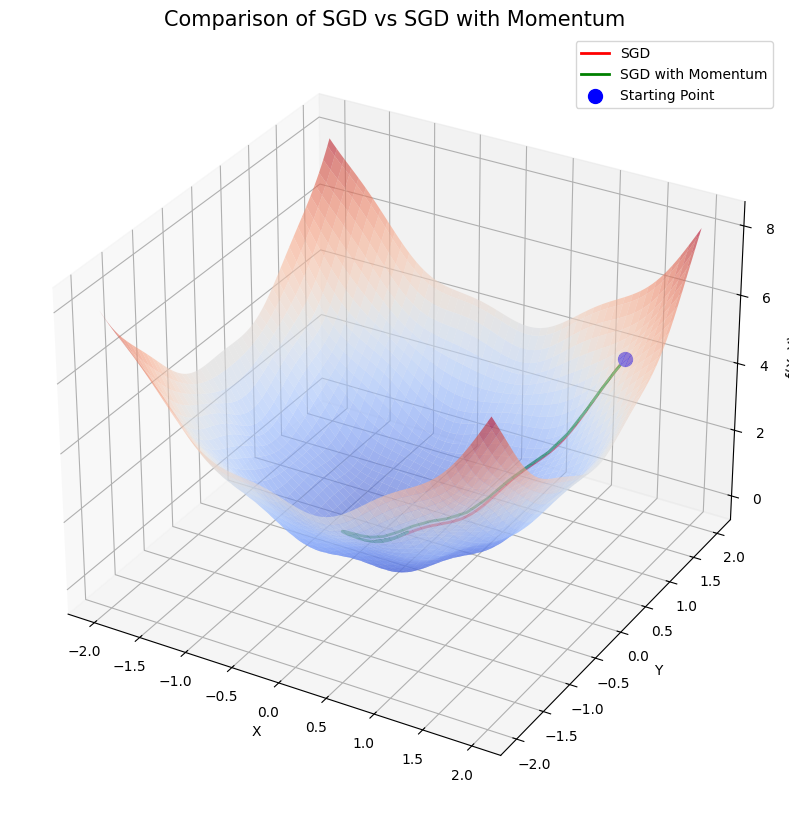

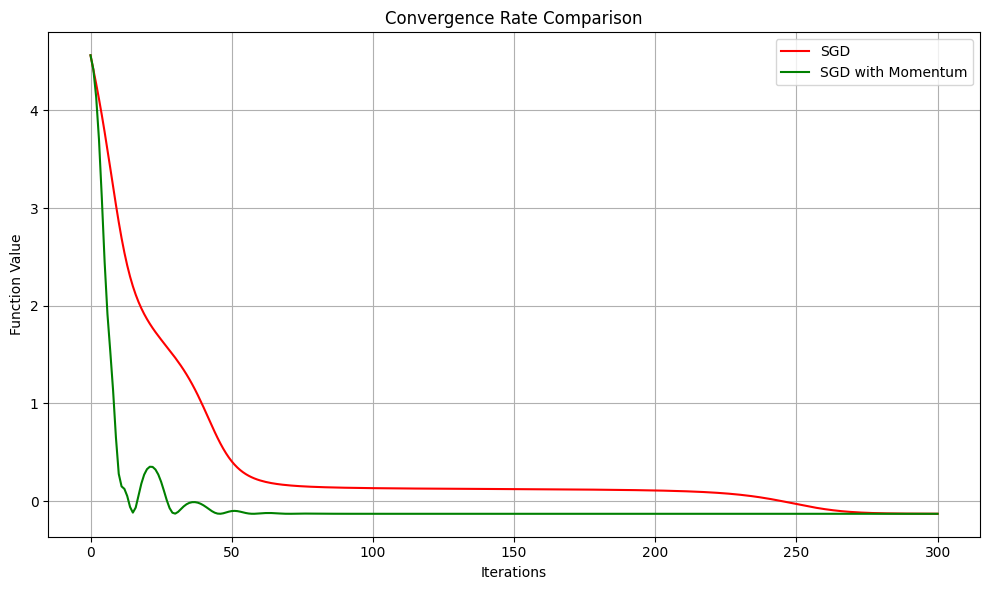

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Define a function with multiple minima (two local minima and one global minimum)
def f(x, y):
    return np.sin(5 * x) * np.cos(5 * y) / 5 + x**2 + y**2

# Gradient of the function
def grad_f(x, y):
    # Compute partial derivatives
    df_dx = np.cos(5 * x) * np.cos(5 * y) + 2 * x
    df_dy = -np.sin(5 * x) * np.sin(5 * y) + 2 * y
    return np.array([df_dx, df_dy])

# Implement SGD
def sgd(start_x, start_y, learning_rate, num_iterations):
    path = np.zeros((num_iterations + 1, 2))
    path[0] = [start_x, start_y]
    
    x, y = start_x, start_y
    
    for i in range(num_iterations):
        grad = grad_f(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        path[i + 1] = [x, y]
    
    return path

# Implement SGD with momentum
def sgd_momentum(start_x, start_y, learning_rate, momentum, num_iterations):
    path = np.zeros((num_iterations + 1, 2))
    path[0] = [start_x, start_y]
    
    x, y = start_x, start_y
    velocity = np.zeros(2)
    
    for i in range(num_iterations):
        grad = grad_f(x, y)
        velocity = momentum * velocity - learning_rate * grad
        x += velocity[0]
        y += velocity[1]
        path[i + 1] = [x, y]
    
    return path

# Set up the plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for the surface
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, linewidth=0)

# Set starting point (intentionally near a local minimum)
start_x, start_y = 1.5, 1.5

# Run both optimizers
sgd_path = sgd(start_x, start_y, 0.01, 300)
momentum_path = sgd_momentum(start_x, start_y, 0.01, 0.9, 300)

# Calculate Z values for the paths
sgd_z = np.array([f(x, y) for x, y in sgd_path])
momentum_z = np.array([f(x, y) for x, y in momentum_path])

# Plot the paths
ax.plot(sgd_path[:, 0], sgd_path[:, 1], sgd_z, 'r-', linewidth=2, label='SGD')
ax.plot(momentum_path[:, 0], momentum_path[:, 1], momentum_z, 'g-', linewidth=2, label='SGD with Momentum')

# Mark the starting point
ax.scatter([start_x], [start_y], [f(start_x, start_y)], color='blue', s=100, label='Starting Point')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Comparison of SGD vs SGD with Momentum', fontsize=15)
ax.legend()

# Add a smaller plot to show the convergence rate
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sgd_z)), sgd_z, 'r-', label='SGD')
plt.plot(np.arange(len(momentum_z)), momentum_z, 'g-', label='SGD with Momentum')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Convergence Rate Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

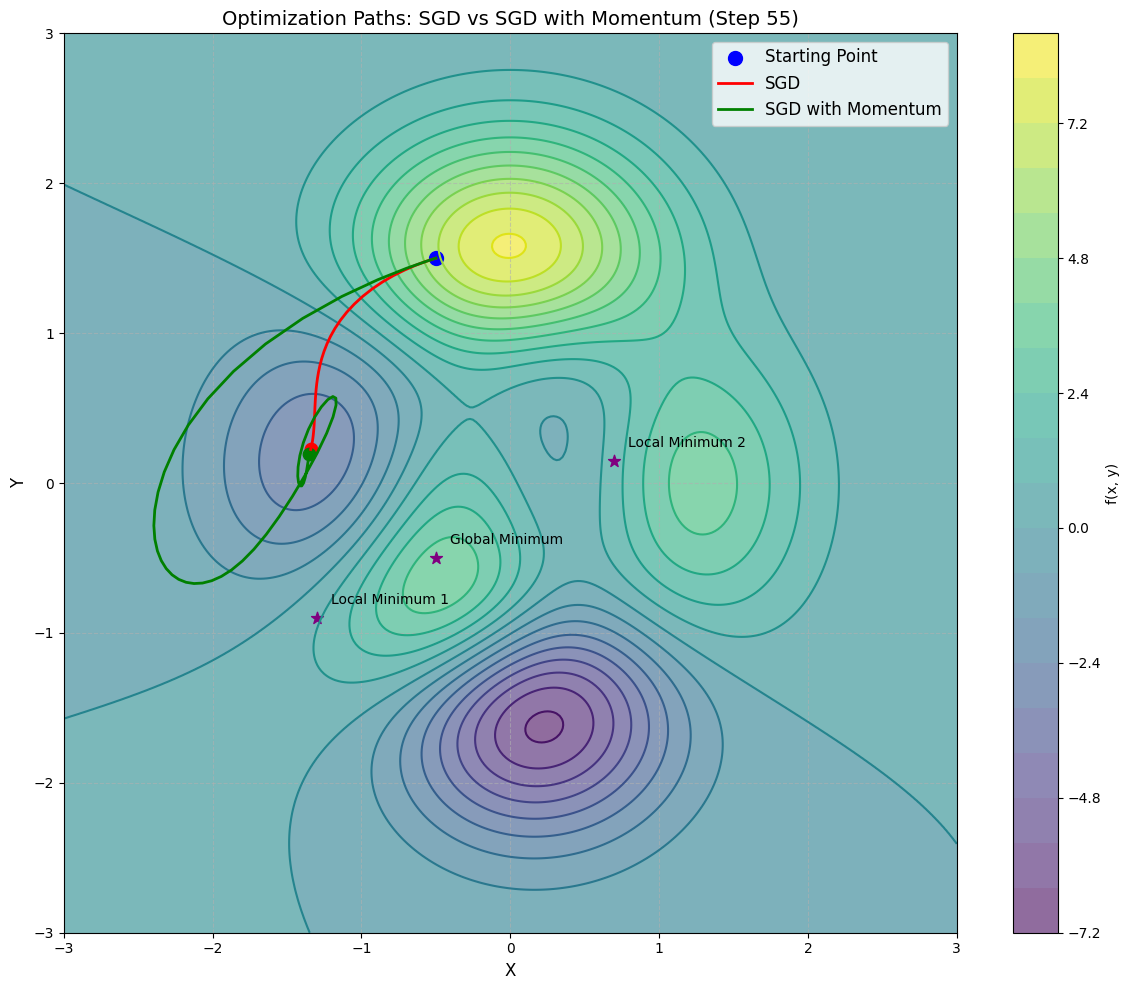

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from IPython.display import display, clear_output
import time

# Create a function with two local minima and one global minimum
def f(x, y):
    return 3*(1-x)**2 * np.exp(-x**2 - (y+1)**2) \
           - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) \
           - 1/3 * np.exp(-(x+1)**2 - y**2)

# Compute gradient of the function
def grad_f(x, y):
    eps = 1e-8  # Small value for numerical differentiation
    df_dx = (f(x + eps, y) - f(x - eps, y)) / (2 * eps)
    df_dy = (f(x, y + eps) - f(x, y - eps)) / (2 * eps)
    return np.array([df_dx, df_dy])

# Implement SGD
def sgd(start_x, start_y, learning_rate, num_iterations):
    path = np.zeros((num_iterations + 1, 2))
    path[0] = [start_x, start_y]
    
    x, y = start_x, start_y
    
    for i in range(num_iterations):
        grad = grad_f(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        path[i + 1] = [x, y]
    
    return path

# Implement SGD with momentum
def sgd_momentum(start_x, start_y, learning_rate, momentum, num_iterations):
    path = np.zeros((num_iterations + 1, 2))
    path[0] = [start_x, start_y]
    
    x, y = start_x, start_y
    velocity = np.zeros(2)
    
    for i in range(num_iterations):
        grad = grad_f(x, y)
        velocity = momentum * velocity - learning_rate * grad
        x += velocity[0]
        y += velocity[1]
        path[i + 1] = [x, y]
    
    return path

# Create grid for contour plot
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set starting points (choose points that will show the difference between methods)
start_x, start_y = -0.5, 1.5

# Run optimizers
n_iter = 150
sgd_path = sgd(start_x, start_y, 0.01, n_iter)
momentum_path = sgd_momentum(start_x, start_y, 0.01, 0.9, n_iter)

# Add annotations for minima (this is approximate for this example function)
minima_points = [(-1.3, -0.9), (0.7, 0.15), (-0.5, -0.5)]
labels = ['Local Minimum 1', 'Local Minimum 2', 'Global Minimum']

# Create a manual animation by updating the plot in a loop
# This is more reliable than FuncAnimation for notebooks
plt.figure(figsize=(12, 10))

# Use a smaller number of frames for the animation to make it faster
step = 1  
frames = range(0, n_iter+1, step)

for frame in frames:
    plt.clf()  # Clear the current figure
    
    # Plot the contour
    contour = plt.contour(X, Y, Z, 20, cmap='viridis')
    plt.contourf(X, Y, Z, 20, cmap='viridis', alpha=0.6)
    plt.colorbar(label='f(x, y)')
    plt.title(f'Optimization Paths: SGD vs SGD with Momentum (Step {frame})', fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    
    # Plot the starting point
    plt.scatter(start_x, start_y, color='blue', s=100, marker='o', label='Starting Point')
    
    # Plot paths up to current frame
    if frame > 0:
        plt.plot(sgd_path[:frame, 0], sgd_path[:frame, 1], 'r-', linewidth=2, label='SGD')
        plt.plot(momentum_path[:frame, 0], momentum_path[:frame, 1], 'g-', linewidth=2, label='SGD with Momentum')
    
    # Plot current positions
    if frame > 0:
        plt.scatter(sgd_path[frame-1, 0], sgd_path[frame-1, 1], color='red', s=80, marker='o')
        plt.scatter(momentum_path[frame-1, 0], momentum_path[frame-1, 1], color='green', s=80, marker='o')
    
    # Add minima points
    for i, (x_min, y_min) in enumerate(minima_points):
        plt.scatter(x_min, y_min, color='purple', s=80, marker='*')
        plt.annotate(labels[i], (x_min, y_min), fontsize=10, 
                    xytext=(10, 10), textcoords='offset points')
    
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.1)  # Pause for a short time between frames

# Show final plot (static) with complete paths
plt.figure(figsize=(12, 10))
contour = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.contourf(X, Y, Z, 20, cmap='viridis', alpha=0.6)
plt.colorbar(label='f(x, y)')
plt.title('Complete Optimization Paths: SGD vs SGD with Momentum', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

# Plot the complete paths
plt.scatter(start_x, start_y, color='blue', s=100, marker='o', label='Starting Point')
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'r-', linewidth=2, label='SGD')
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'g-', linewidth=2, label='SGD with Momentum')

# Add annotations for minima
for i, (x_min, y_min) in enumerate(minima_points):
    plt.scatter(x_min, y_min, color='purple', s=80, marker='*')
    plt.annotate(labels[i], (x_min, y_min), fontsize=10, 
                xytext=(10, 10), textcoords='offset points')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Add an explanatory markdown cell